<a href="https://colab.research.google.com/github/jjian2/bigdata/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_09%EC%A1%B0_20231597_%EC%B5%9C%EC%A7%80%EC%95%88_20231598_%EA%B9%80%EC%9A%B1%ED%98%84(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**https://seo00.tistory.com/60**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train.shape)  #(891, 12)
print(test.shape)  #(418, 11)

submission.head()

(891, 12)
(418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

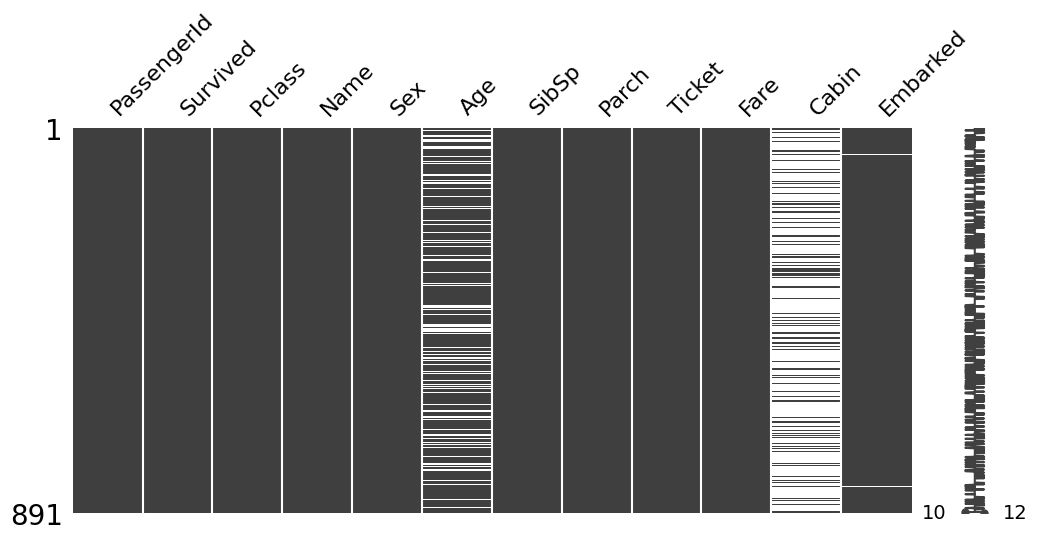

In [ ]:
# 결측치 시각화
import missingno as msno
msno.matrix(train, figsize=(12, 5))

<Axes: ylabel='count'>

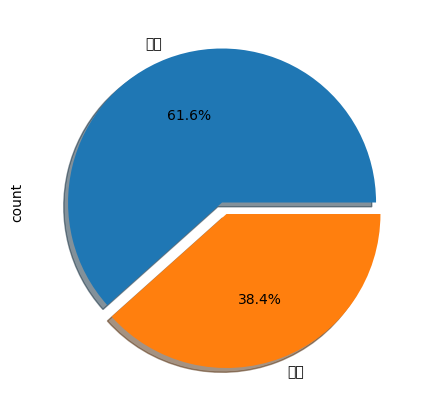

In [ ]:
# 생존비율 확인
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['사망', '생존']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08],
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=labels)

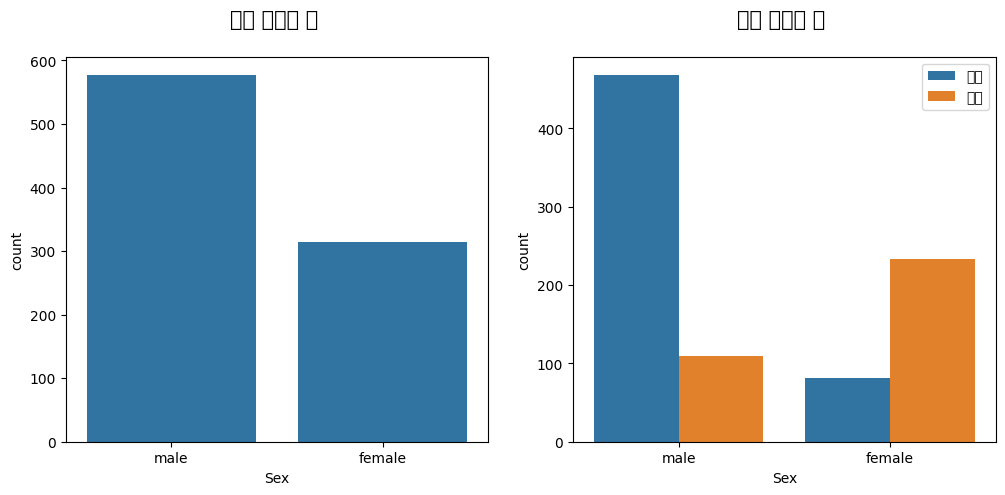

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

Text(0.5, 1.0, 'class별 생존률')

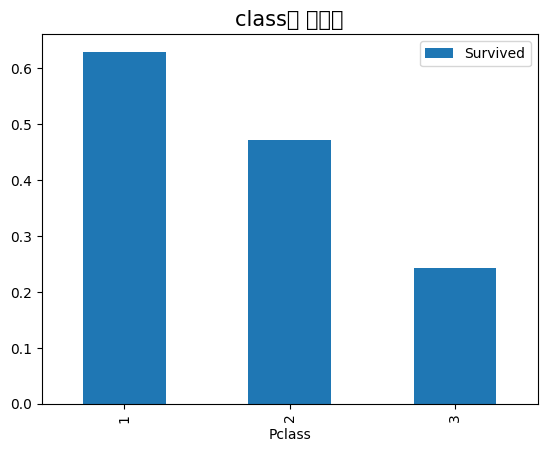

In [ ]:
# class별 생존률
sur = train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
sur.set_title('class별 생존률', size=15)

In [ ]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

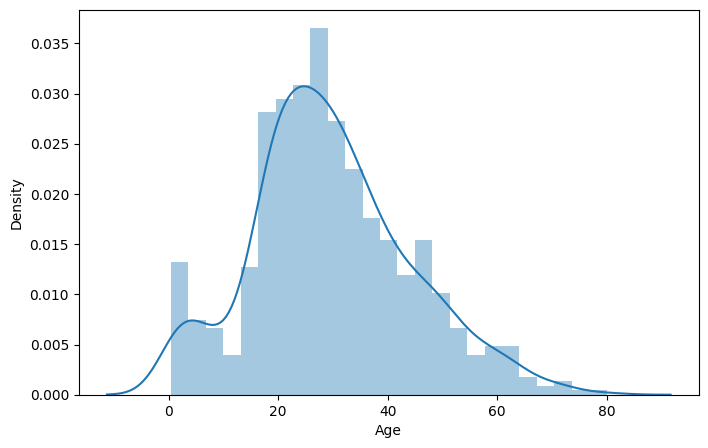

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(train['Age'], bins=25)

<Axes: xlabel='Age', ylabel='Density'>

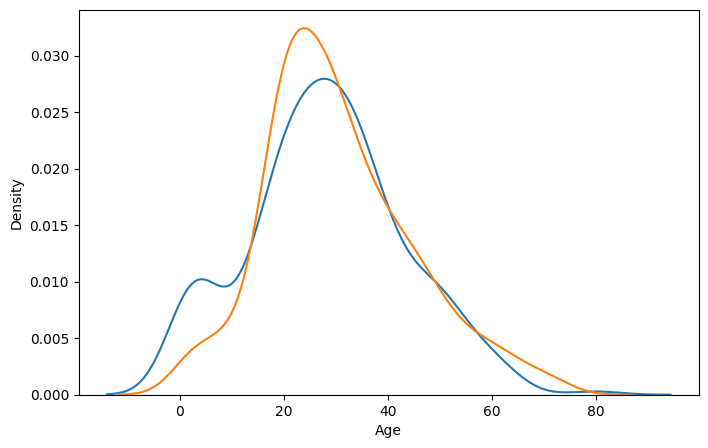

In [ ]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False)
sns.distplot(dead['Age'], bins=25, hist=False)

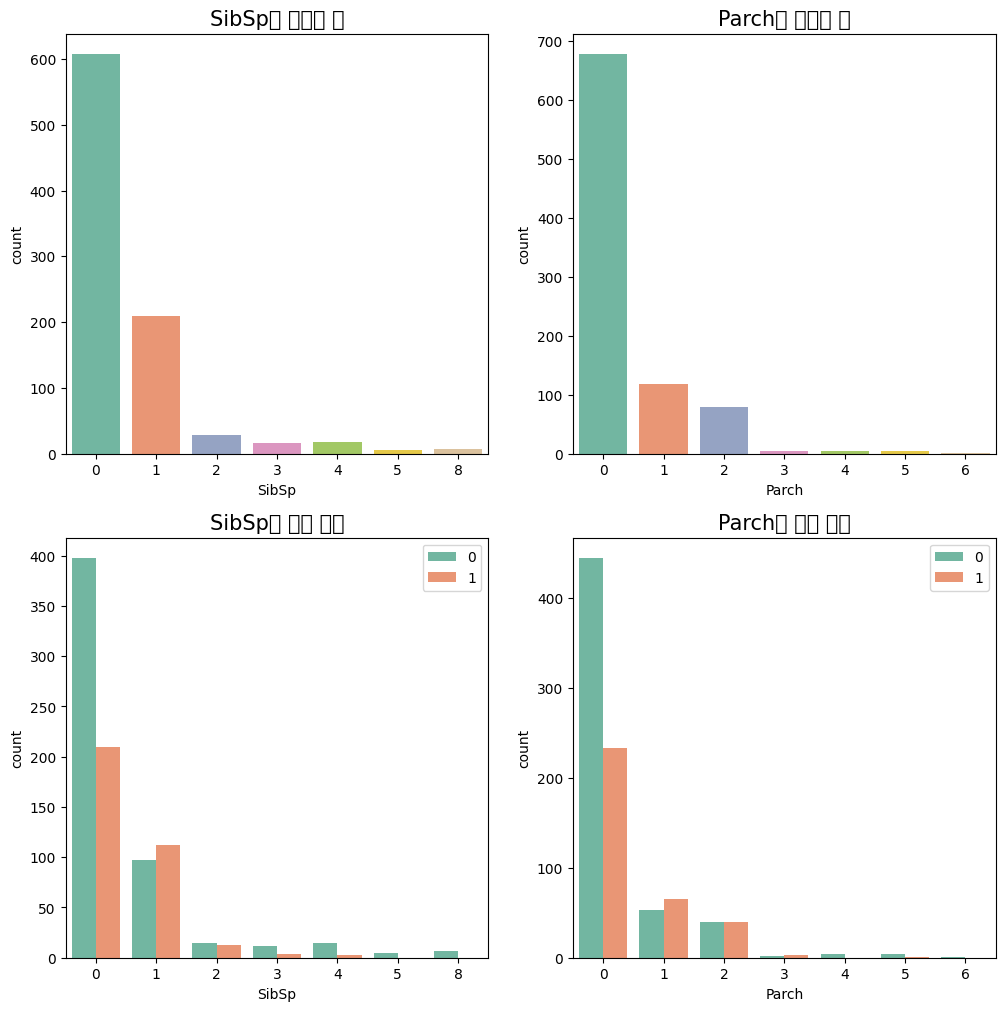

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0][0].set_title("SibSp별 탑승자 수", size=15)
sns.countplot(x="SibSp", data=train, ax=axes[0][0], palette="Set2")
axes[0][1].set_title("Parch별 탑승자 수", size=15)
sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")

axes[1][0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(loc='upper right')
axes[1][1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

In [ ]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


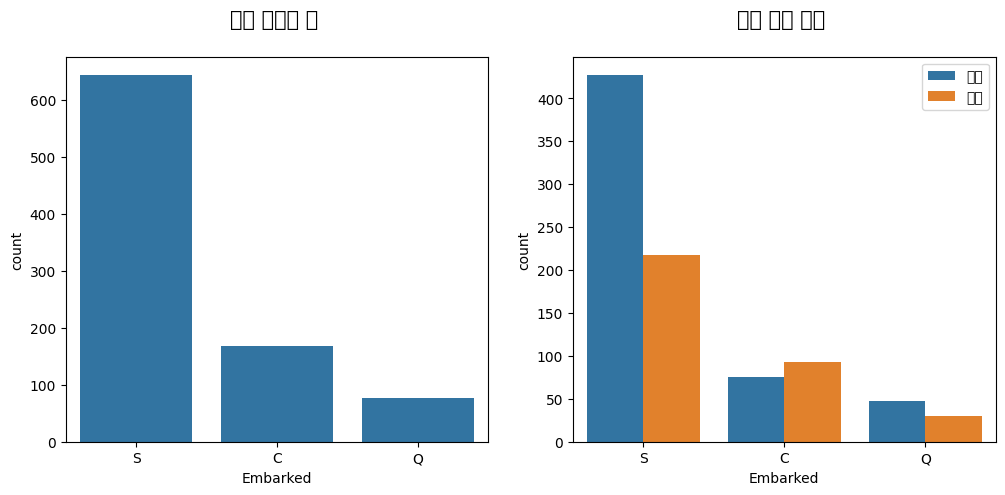

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("성별 생존 여부 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: >

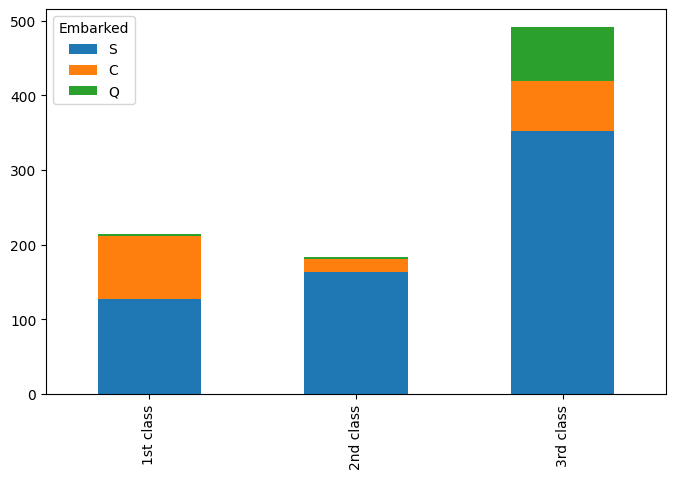

In [ ]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)

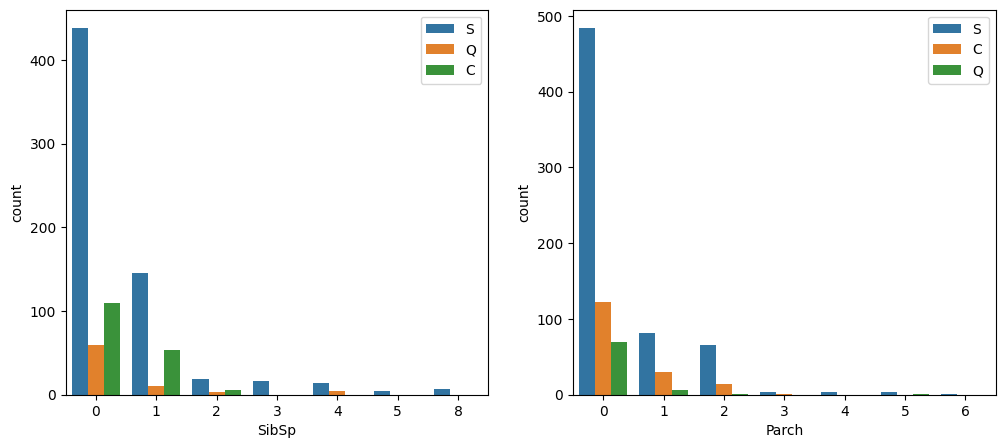

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

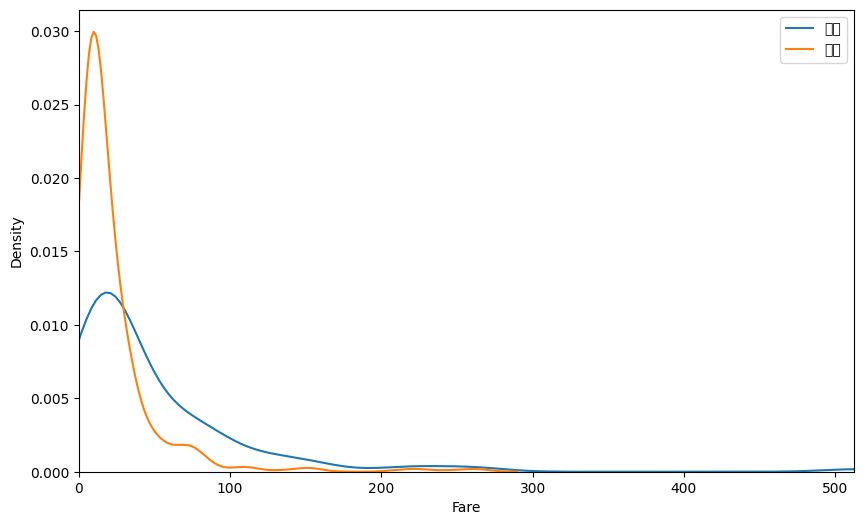

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)

# 축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['생존', '사망'])

plt.show()

In [ ]:
train.columns
# Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')